**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# install optuna for tuning
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 7.7 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,OrdinalEncoder,PowerTransformer,FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score


In [ ]:
df=pd.read_csv('/content/MagicBricks.csv')

**DATA-PREPROCESSING**

In [ ]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [ ]:
df['Type'].value_counts()

,count
Type,
Builder_Floor,661
Apartment,593


In [ ]:
df.drop('Locality',axis = 1 ,inplace =True)

In [ ]:
df.head()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [ ]:
df.shape

(1259, 10)

In [ ]:
df.describe().style.background_gradient(cmap='Blues')

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1259.000000,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,21306703.733122,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,25601154.525780,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1000000.000000,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5700000.000000,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,14200000.000000,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,25500000.000000,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,240000000.000000,183333.000000


In [ ]:
# bathroom col contain 3 Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Parking      1226 non-null   float64
 5   Price        1259 non-null   int64  
 6   Status       1259 non-null   object 
 7   Transaction  1259 non-null   object 
 8   Type         1254 non-null   object 
 9   Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 98.5+ KB


In [ ]:
df.tail(20)

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
1239,1450.0,3,3.0,Semi-Furnished,1.0,22500000,Ready_to_move,Resale,Builder_Floor,18333.0
1240,1000.0,2,2.0,Semi-Furnished,1.0,7500000,Ready_to_move,Resale,Apartment,18333.0
1241,2430.0,4,4.0,Furnished,5.0,30000000,Ready_to_move,Resale,Builder_Floor,18333.0
1242,945.0,2,1.0,Unfurnished,5.0,6500000,Ready_to_move,Resale,Apartment,6878.0
1243,1650.0,3,3.0,Unfurnished,5.0,35000000,Ready_to_move,New_Property,Builder_Floor,6878.0
1244,1350.0,3,2.0,Semi-Furnished,1.0,17500000,Ready_to_move,Resale,Builder_Floor,6878.0
1245,2625.0,4,5.0,Semi-Furnished,2.0,60000000,Ready_to_move,New_Property,Builder_Floor,6878.0
1246,1800.0,4,4.0,Semi-Furnished,2.0,40000000,Ready_to_move,New_Property,Builder_Floor,6878.0
1247,125.0,3,3.0,Semi-Furnished,2.0,11500000,Ready_to_move,New_Property,Builder_Floor,6878.0
1248,1440.0,3,3.0,Semi-Furnished,2.0,22500000,Ready_to_move,New_Property,Builder_Floor,6878.0


#Bathroom , Furnishing, Parking, type , per_sqft contain Missing values

**Handle Missing Values**

In [ ]:
# checking Missing values
df.isnull().sum()

,0
Area,0
BHK,0
Bathroom,2
Furnishing,5
Parking,33
Price,0
Status,0
Transaction,0
Type,5
Per_Sqft,241


In [ ]:
#percentage value
null_percent = (df.isnull().mean() * 100).round(2)
null_percent

,0
Area,0.00
BHK,0.00
Bathroom,0.16
Furnishing,0.40
Parking,2.62
Price,0.00
Status,0.00
Transaction,0.00
Type,0.40
Per_Sqft,19.14


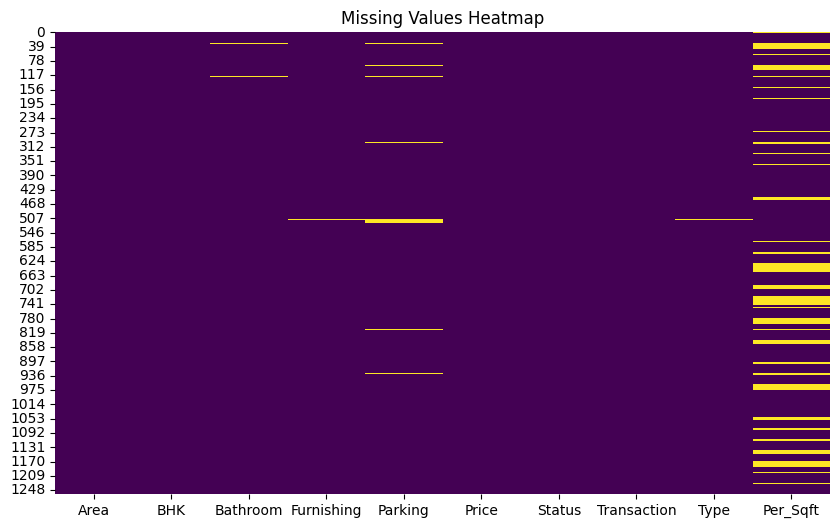

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
# Handle the Missing values
df['Bathroom'] =df['Bathroom'].fillna(df['Bathroom'].median())
df['Furnishing'] = df['Furnishing'].fillna(df['Furnishing'].mode()[0])
df['Parking'] = df['Parking'].fillna(df['Parking'].median())
df['Type'] = df['Type'].fillna(df['Type'].mode())
df['Per_Sqft'] = df['Per_Sqft'].fillna(df['Parking'].median())

In [ ]:
df['Type'].value_counts()

,count
Type,
Builder_Floor,661
Apartment,593


In [ ]:
# Checking Duplicate , 83 rows are duplicated
df.duplicated().sum()

np.int64(83)

In [ ]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Parking', 'Price', 'Status',
       'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [ ]:
# to check the Data Distribution
numerical_cols = df.select_dtypes(include='number').columns
print(df[numerical_cols].skew())

Area         7.870009
BHK          0.539503
Bathroom     0.826806
Parking     14.819394
Price        3.557084
Per_Sqft     5.390505
dtype: float64




**DATA VISUALIZATION**





<Axes: ylabel='Density'>

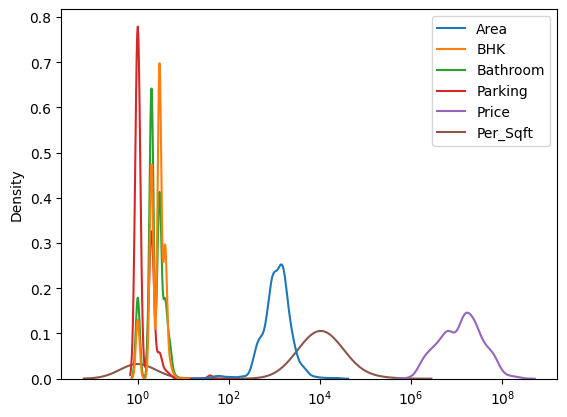

In [ ]:
sns.kdeplot(df,log_scale=True)

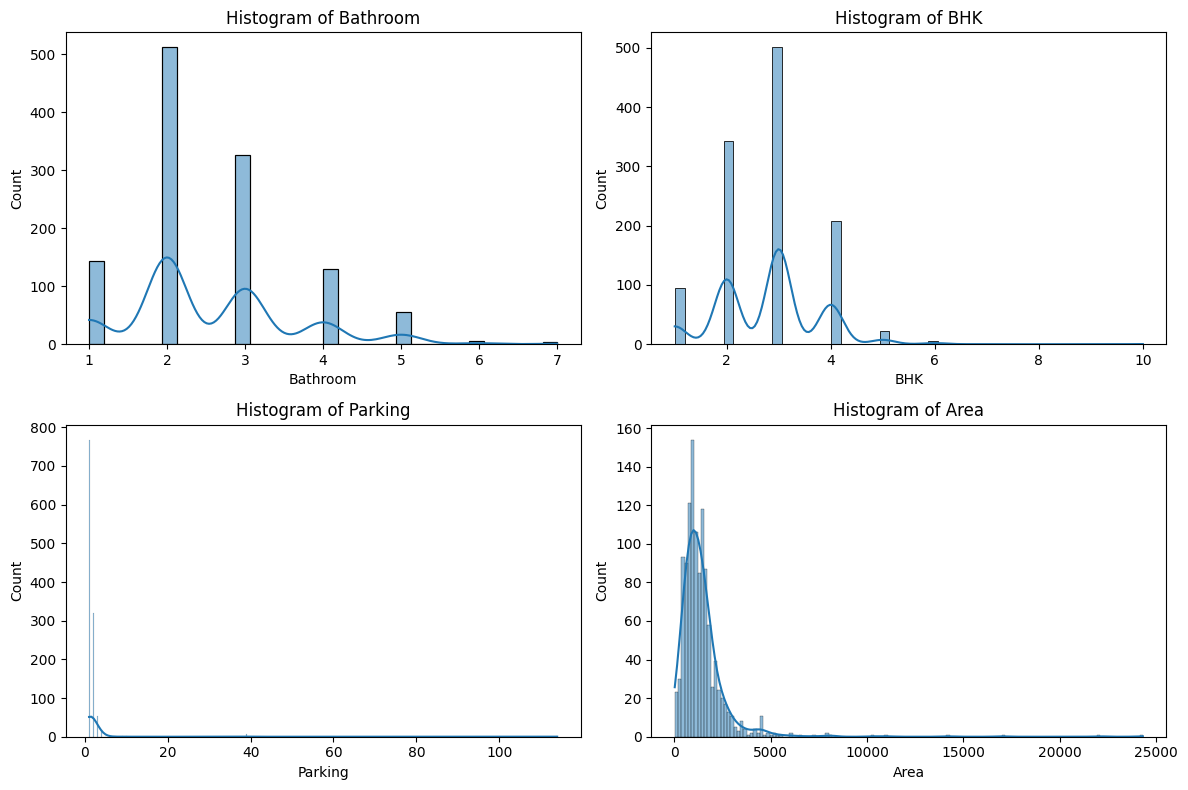

In [ ]:
# sns.histplot(df['Bathroom'],kde=True)
# sns.histplot(df['BHK'],kde=True)
# sns.histplot(df['Parking'],kde=True)
# sns.histplot(df['Area'],kde=True)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot each histogram separately
sns.histplot(df['Bathroom'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Bathroom')

sns.histplot(df['BHK'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of BHK')

sns.histplot(df['Parking'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Parking')

sns.histplot(df['Area'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Area')
# Adjust spacing
plt.tight_layout()
plt.show()

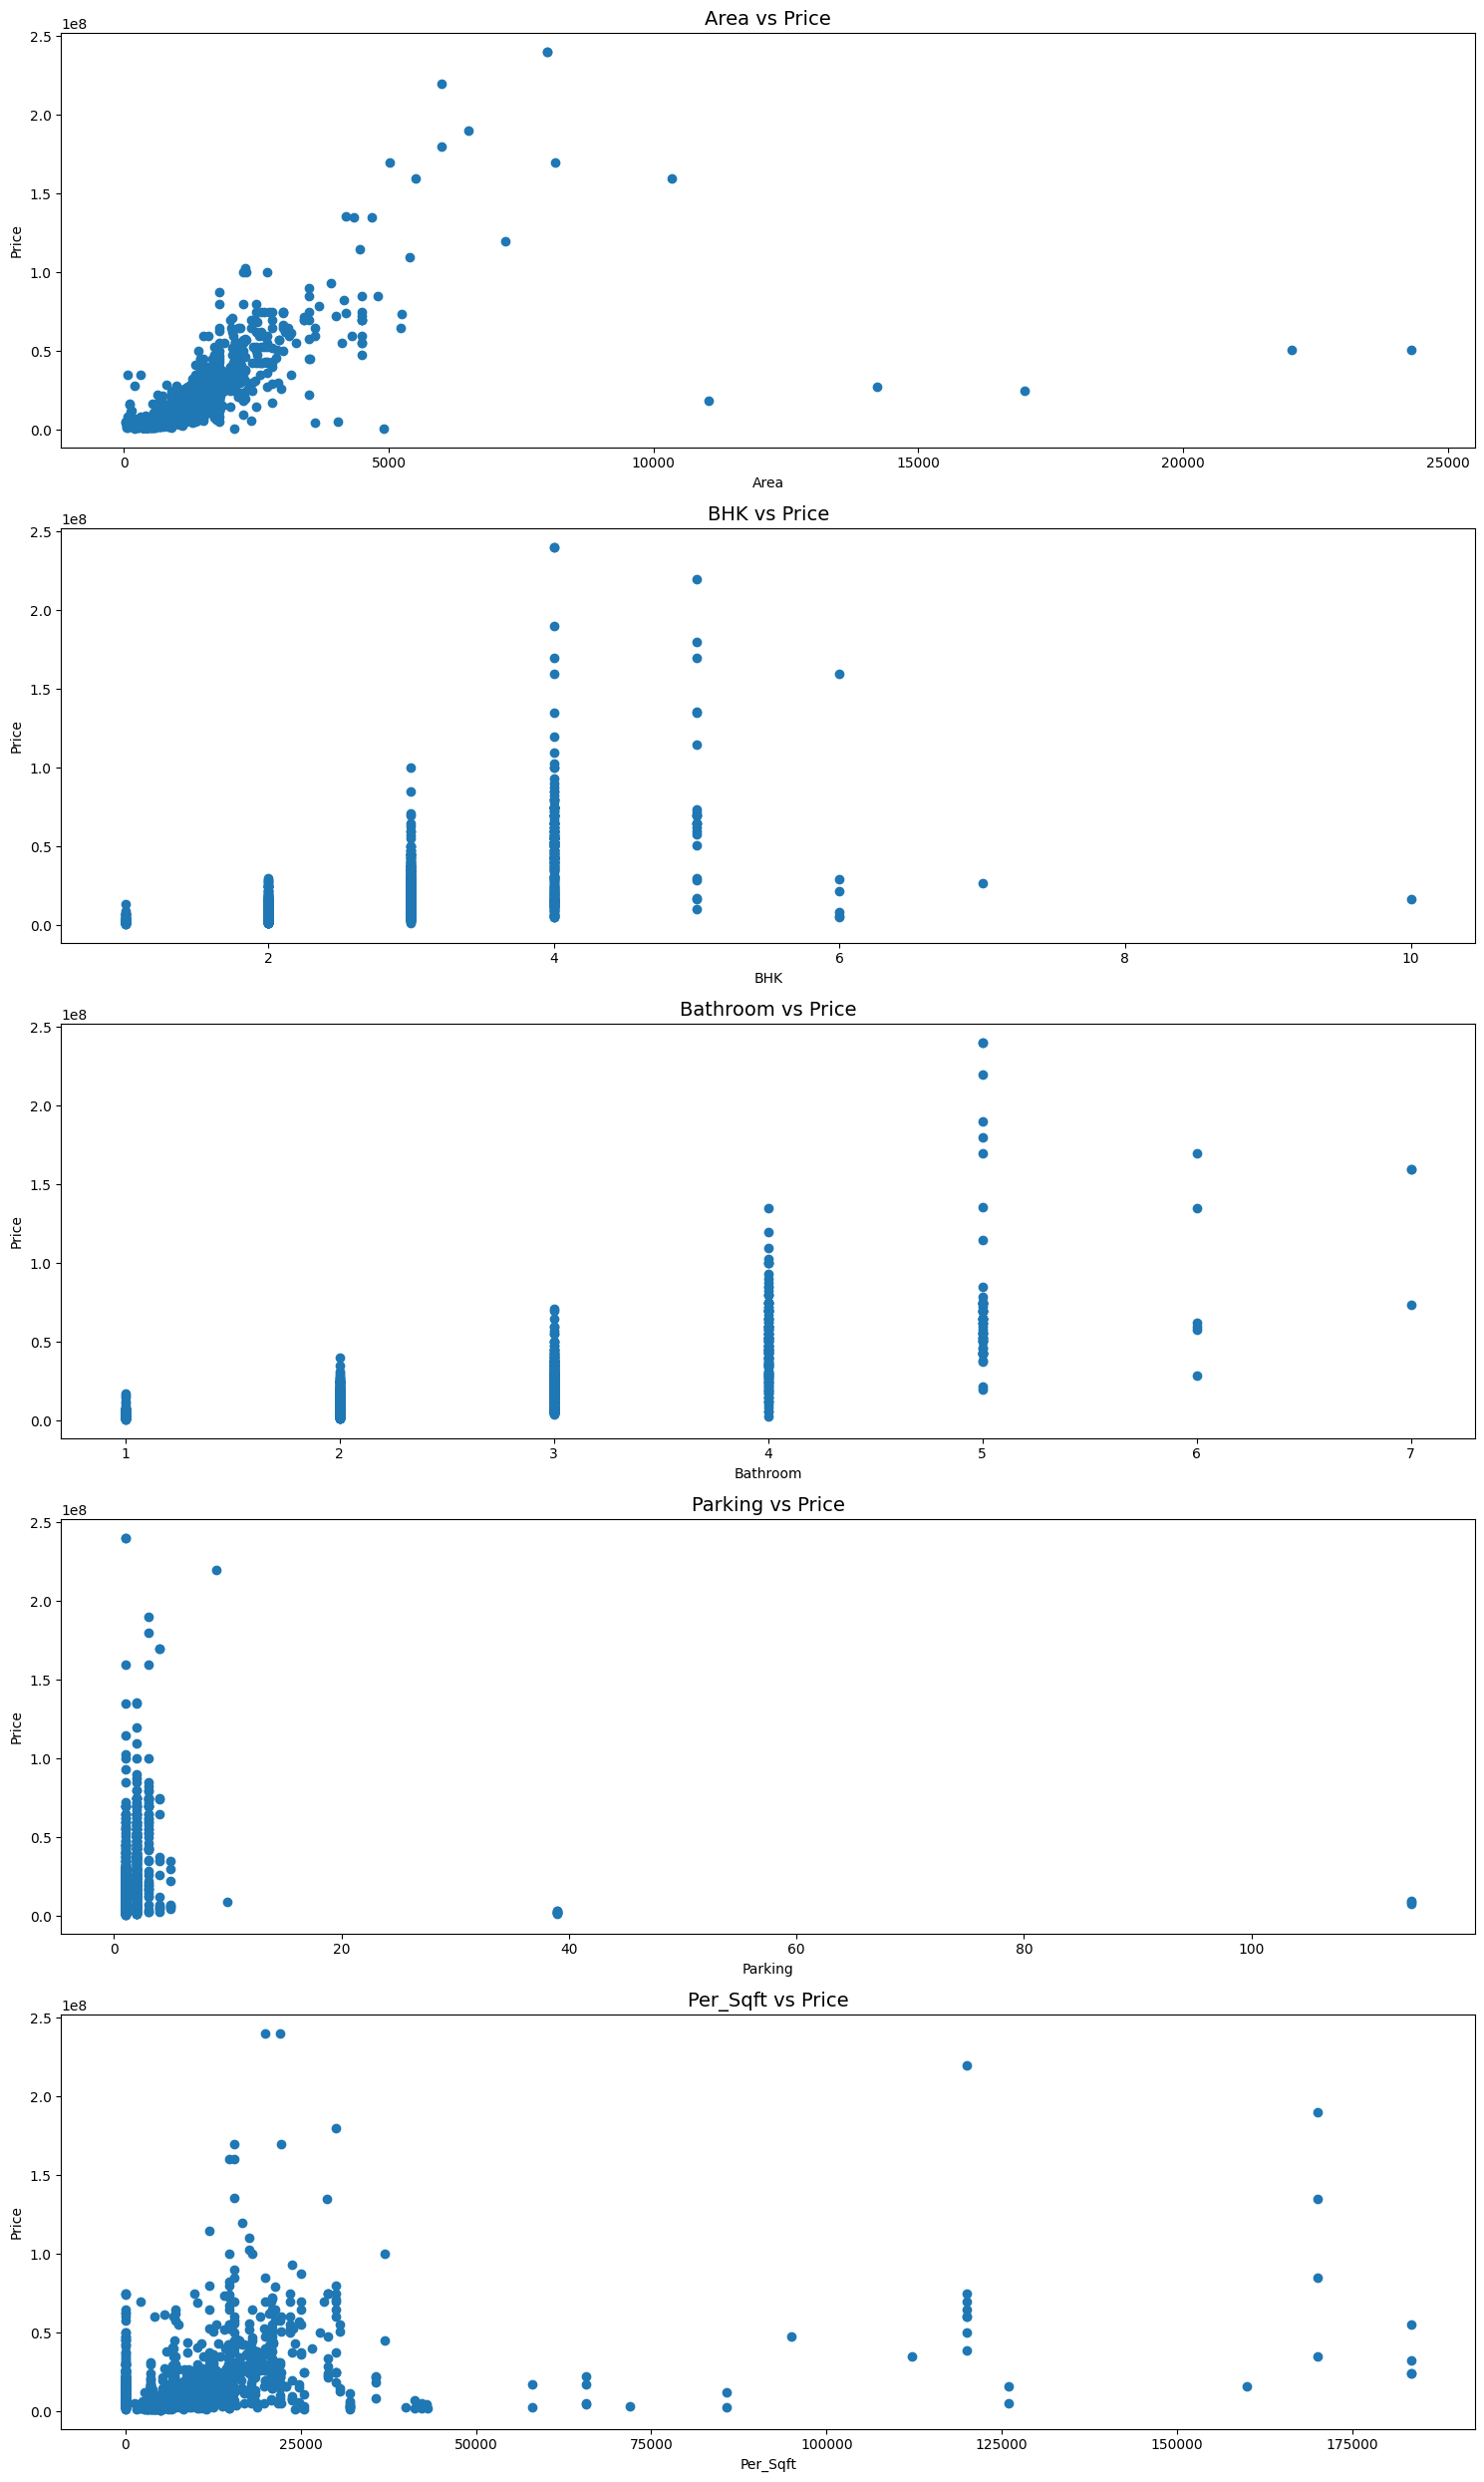

In [ ]:

target = "Price"

# Select only numerical columns except target
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
num_cols.remove(target)

# Number of plots
n = len(num_cols)

# Create subplots
plt.figure(figsize=(15, 5 * n))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n, 1, i)     # n rows, 1 column, plot i
    plt.scatter(df[col], df[target])
    plt.title(f"{col} vs {target}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

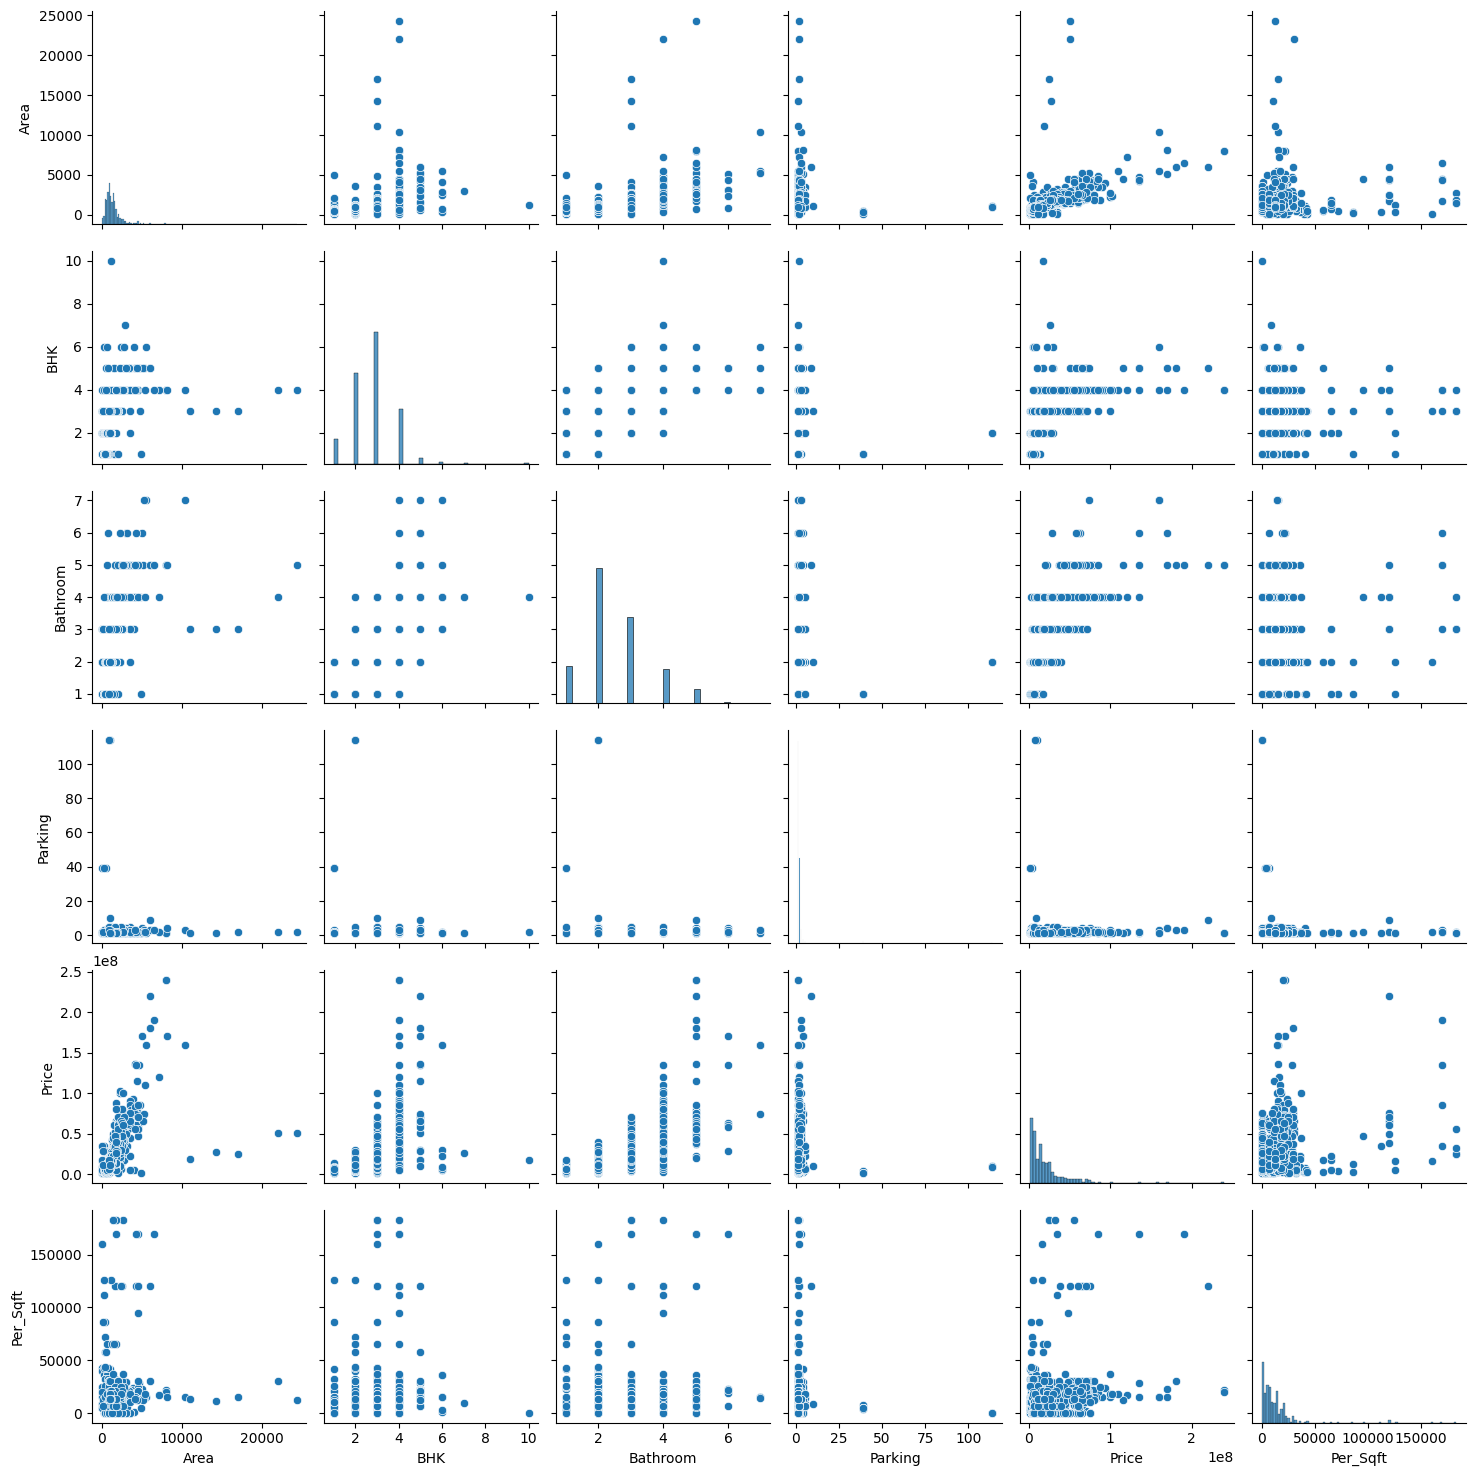

In [ ]:
sns.pairplot(df)

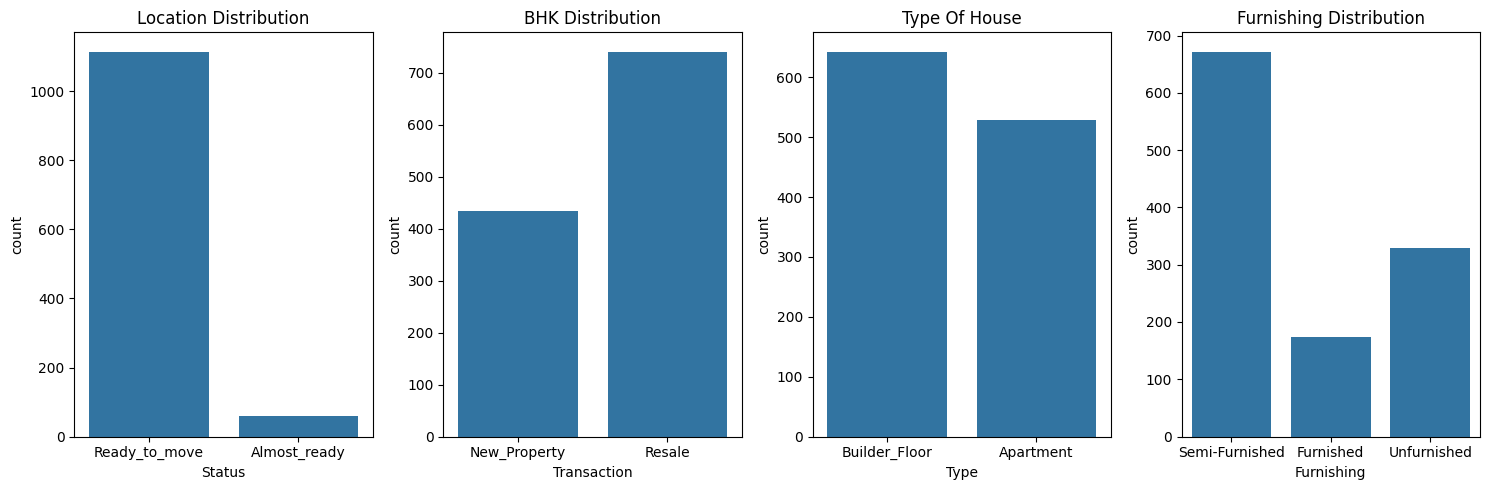

In [ ]:
# for categorical columns
plt.figure(figsize=(15, 5))

# --- Subplot 1 ---
plt.subplot(1, 4, 1)
sns.countplot(data=df, x="Status")
plt.title("Location Distribution")

# --- Subplot 2 ---
plt.subplot(1, 4, 2)
sns.countplot(data=df, x="Transaction")
plt.title("BHK Distribution")

# --- Subplot 3 ---
plt.subplot(1, 4, 3)
sns.countplot(data=df, x="Type")
plt.title("Type Of House")

# plot 3
plt.subplot(1,4,4)
sns.countplot(data=df,x="Furnishing")
plt.title("Furnishing Distribution")
plt.tight_layout()
plt.show()

**TO HANDLE OUTLIERS**

In [ ]:
df.head()


,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,1.0
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [ ]:
import pandas as pd
import numpy as np

# Assuming df is your dataset
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Dictionary to store percentage of outliers
outlier_percent = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

    # Calculate percentage
    percent = (outliers / df.shape[0]) * 100
    outlier_percent[col] = round(percent, 2)

# Convert to DataFrame for better visualization
outlier_df = pd.DataFrame.from_dict(outlier_percent, orient='index', columns=['% of Outliers'])
print(outlier_df)


          % of Outliers
Area               5.19
BHK                2.64
Bathroom           5.53
Parking            2.81
Price              7.82
Per_Sqft           3.83


In [ ]:
remove_cols = ['BHK', 'Parking','Per_Sqft']  # remove outliers in these columns

for col in remove_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Remove rows outside bounds
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [ ]:
cap_cols = ['Bathroom', 'Area']  # Cap the values of outliers

for col in cap_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap outliers
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

In [ ]:
df.shape

(1074, 10)

In [ ]:
print(df['Transaction'].value_counts())
print(df['Furnishing'].value_counts())
print(df['Status'].value_counts())
print(df['Type'].value_counts())
categ_col =['Transaction','Furnishing','Status','Type']

Transaction
Resale          681
New_Property    393
Name: count, dtype: int64
Furnishing
Semi-Furnished    622
Unfurnished       300
Furnished         152
Name: count, dtype: int64
Status
Ready_to_move    1020
Almost_ready       54
Name: count, dtype: int64
Type
Builder_Floor    582
Apartment        489
Name: count, dtype: int64


MODEL IMPLEMENTATION

In [ ]:
X = df.drop("Price" , axis=1)
y = df['Price']

In [ ]:
y

,Price
0,6500000
1,5000000
2,15500000
3,4200000
4,6200000
...,...
1254,55000000
1255,12500000
1256,17500000
1257,11500000


In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
num_cols

Index(['Area', 'BHK', 'Bathroom', 'Parking', 'Price', 'Per_Sqft'], dtype='object')

In [ ]:
log_transformer = FunctionTransformer(np.log1p, validate=False)

In [ ]:
numerical_cols =['Area', 'BHK', 'Bathroom', 'Parking', 'Per_Sqft']

In [ ]:
# trf1 = ColumnTransformer([
#      ('Imputer_Num',SimpleImputer(strategy='median'),numerical_cols)
# ])

In [ ]:
Num_Pipe =Pipeline([
    ('Numerical_col',SimpleImputer(strategy='median')),
    ('logtransform',log_transformer),
    ("Scaling",StandardScaler())
])

In [ ]:
Ordinal_cols =['Furnishing','Status']
Nominal_cols =['Transaction', 'Type']
furnishing_order =['Unfurnished','Semi-Furnished','Furnished']
Status_order =['Almost_ready','Ready_to_move']
preprocess = ColumnTransformer([
    ('numerical',Num_Pipe,numerical_cols),
    ('cat_ord', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinal', OrdinalEncoder(categories=[furnishing_order, Status_order]))
    ]), Ordinal_cols),
     ('cat_nom', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
    ]), Nominal_cols)


])

In [ ]:
from sklearn.linear_model import LinearRegression
REG =LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "RandomForest": RandomForestRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "GradientBoosting": GradientBoostingRegressor()
     }

results = {}
best_score = -999
best_model_name = None
best_model_pipeline = None

for name,model in models.items():
  Pipe =Pipeline(steps=[
    ('preprocessing',preprocess),
    ('model',model)
           ])
  Pipe.fit(X_train,y_train)
  y_pred = Pipe.predict(X_test)
  score = r2_score(y_test, y_pred)

  results[name] = score
  print(f"{name} R2 Score: {score}")

  if score > best_score:
      best_score = score
      best_model_name = name
      best_model_pipeline = Pipe

# final output
print("\nBest Model:", best_model_name)
print("Best R2 Score:", best_score)


LinearRegression R2 Score: 0.387696015672262
Ridge R2 Score: 0.38769305044902913
Lasso R2 Score: 0.3876960158032108
RandomForest R2 Score: 0.7130460122466756
DecisionTree R2 Score: 0.4192515073516686
GradientBoosting R2 Score: 0.6453604101540378

Best Model: RandomForest
Best R2 Score: 0.7130460122466756


In [ ]:
# from sklearn.model_selection import GridSearchCV
# Pipe =Pipeline(steps=[
#     ('preprocessing',preprocess),
#     ('model',REG)
#            ])




In [ ]:
RF = RandomForestRegressor()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define the objective function
def objective(trial):
    # Suggest values for the hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 270)
    max_depth = trial.suggest_int('max_depth', 2, 25)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    criterion = trial.suggest_categorical("criterion", ["squared_error", "absolute_error", "friedman_mse"])


    # Create the RandomForestClassifier with suggested hyperparameters
    model1 = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        min_samples_split =min_samples_split,
        max_features=max_features,
        criterion =criterion,
        random_state=42
    )
    # pipeline
    Pipe =Pipeline(steps=[
    ('preprocessing',preprocess),
    ('model',model1)
           ])

    # Perform 3-fold cross-validation and calculate r2
    score = cross_val_score(Pipe, X_train, y_train, cv=3, scoring='r2').mean()

    return score  # Return the accuracy score for Optuna to maximize

In [ ]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())  # We aim to maximize accuracy
study.optimize(objective, n_trials=40)

[I 2025-12-14 10:30:53,987] A new study created in memory with name: no-name-1f593b7c-d77c-4bae-9cb1-846cf7bd3636
[I 2025-12-14 10:30:56,704] Trial 0 finished with value: 0.7236365692700639 and parameters: {'n_estimators': 181, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'log2', 'criterion': 'absolute_error'}. Best is trial 0 with value: 0.7236365692700639.
[I 2025-12-14 10:30:57,177] Trial 1 finished with value: 0.719515873623056 and parameters: {'n_estimators': 76, 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'squared_error'}. Best is trial 0 with value: 0.7236365692700639.
[I 2025-12-14 10:30:58,400] Trial 2 finished with value: 0.72252618142974 and parameters: {'n_estimators': 81, 'max_depth': 19, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': 'log2', 'criterion': 'absolute_error'}. Best is trial 0 with value: 0.7236365692700639.
[I 2025-12-14 10:30:59,530] Trial 3 finished 

In [ ]:
print(study.best_params)
print(study.best_value)

{'n_estimators': 242, 'max_depth': 13, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'log2', 'criterion': 'absolute_error'}
0.7266632641203675


In [ ]:
final_Pipeline =Pipeline(steps=[
    ('preprocessing',preprocess),
    ('model',RandomForestRegressor(**study.best_params,random_state=42))
           ])

In [ ]:
# Pipe =Pipeline(steps=[
#     ('preprocessing',preprocess),
#     ('model',RF)
#            ])

In [ ]:
df.shape

(1074, 10)

In [ ]:
# Pipe.fit(X_train,y_train)

In [ ]:
final_Pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('Numerical_col',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('logtransform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  ['Area', 'BHK', 'Bathroom',
                                                   'Parking', 'Per_Sqft']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_f...
                                                 ('cat_nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Transaction', 'Type'])])),
                ('model',
                 RandomForestRegressor(criterion='absolute_error', max_depth=13,
                                       max_features='log2', min_samples_leaf=5,
                                       min_samples_split=12, n_estimators=242,
                                       random_state=42))])

In [ ]:
X_train['Furnishing'].unique()

array(['Semi-Furnished', 'Unfurnished', 'Furnished'], dtype=object)

In [ ]:
# y_pred =Pipe.predict(X_test)

In [ ]:
y_predict = final_Pipeline.predict(X_test)

**EVALUATION OF Model**

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error


In [ ]:
r2_score(y_test,y_predict)

0.5498999990706968

In [ ]:
scores = cross_val_score(final_Pipeline, X, y, cv=3, scoring='r2')
print(scores)
print(scores.mean())

[0.56006376 0.73117329 0.762119  ]
0.6844520198219577


In [ ]:
MSE =mean_squared_error(y_test,y_predict)
print(MSE)

207498143098571.97


In [ ]:
RMSE = np.sqrt(MSE)
print(RMSE)

14404795.836754229


TEST ON UNSEEN DATA

In [ ]:
New = pd.DataFrame({
    'Furnishing': ['Semi-Furnished'],
    'Status': ['Ready_to_move'],
    'Transaction': ['Resale'],
    'Type': ['Apartment'],
    'Area': [1200],
    'BHK': [2],
    'Bathroom': [2],
    'Per_Sqft': [5000000],
    'Parking':[1]
    # include ALL columns used in training except target
})

In [ ]:
value =final_Pipeline.predict(New)
value

array([19271012.39669421])

**Save the Model**

In [ ]:
import joblib
joblib.dump(final_Pipeline, "house_prediction_pipeline.pkl")


['house_prediction_pipeline.pkl']